# PHASE 2 PROJECT GROUP4 
1. Eugene Kiprop 
2. Sharon Nyakeya
3. Cliffe Kipkorir
4. David Mnene

## STATEMENT OF THE PROBLEM

Our company Crystal Sinema Production, now sees all the big companies creating original video content and they want to get in on the fun. We have decided to create a new movie studio, but we don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of our company's new movie studio can use to help decide what type of films to create.

## PROJECT OVERVIEW
This project anaylses the box office movies data to determine:
1. The most profitable Genres.
2. The most hihgly rated movies.
3. Relationship between production budget and ROI-(Return on Investment).

## DATA SOURCE 

1. Box Office Mojo (bom.movie_gross.csv.gz)

2. IMDB (im.db.zip) - SQLite database containing movie_basics and movie_ratings tables

3. Additional optional sources: Rotten Tomatoes, TheMovieDB, The Numbers

## DATA CLEANING AND EXPLORATORY  DATA ANALYSIS

### Load Data

In [1]:
#Import the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime

%matplotlib inline

In [2]:
#load box office mojo data
bom_df  = pd.read_csv('zippedData/bom.movie_gross.csv')
print("Box Office Mojo Data Shape:", bom_df.shape)
print("\nFirst 5 rows:")
display(bom_df.head())
print("\nData Info:")
bom_df.info()
print("\nMissing Values:")
print(bom_df.isnull().sum())
print("\nBasic Statistics:")
display(bom_df.describe())

Box Office Mojo Data Shape: (3387, 5)

First 5 rows:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

Missing Values:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Basic Statistics:


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [3]:
#load rotten tomatoes movie info data
rt_df  = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')
print("Rotten Tomatoes movie info Shape:", rt_df.shape)
print("\nFirst 5 rows:")
display(rt_df.head())
print("\nData Info:")
rt_df.info()
print("\nMissing Values:")
print(rt_df.isnull().sum())
print("\nBasic Statistics:")
display(rt_df.describe())

Rotten Tomatoes movie info Shape: (1560, 12)

First 5 rows:


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB

Missing Values:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime      

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [4]:
# Try common encodings
encodings_to_try = ['latin-1', 'ISO-8859-1', 'cp1252', 'utf-8-sig']

for encoding in encodings_to_try:
    try:
        rt_r_df = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding=encoding)
        print(f"Success with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed with encoding: {encoding}")
        continue

Success with encoding: latin-1


In [5]:
#load rotten tomatoes review data
rt_r_df  = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t',encoding='latin-1')
print("Rotten Tomatoes movie reviews info Shape:", rt_r_df.shape)
print("\nFirst 5 rows:")
display(rt_r_df.head())
print("\nData Info:")
rt_r_df.info()
print("\nMissing Values:")
print(rt_r_df.isnull().sum())
print("\nBasic Statistics:")
display(rt_r_df.describe())

Rotten Tomatoes movie reviews info Shape: (54432, 8)

First 5 rows:


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB

Missing Values:
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Basic Statistics:


,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [6]:
#load the movie db data
tmdb_df  = pd.read_csv('zippedData/tmdb.movies.csv')
print("The movie db movies Shape:", tmdb_df.shape)
print("\nFirst 5 rows:")
display(tmdb_df.head())
print("\nData Info:")
tmdb_df.info()
print("\nMissing Values:")
print(tmdb_df.isnull().sum())
print("\nBasic Statistics:")
display(tmdb_df.describe())

The movie db movies Shape: (26517, 10)

First 5 rows:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB

Missing Values:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count       

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [7]:
#load the numbers movie budgets data
tn_df  = pd.read_csv('zippedData/tn.movie_budgets.csv')
print("The movie db movies Shape:", tn_df.shape)
print("\nFirst 5 rows:")
display(tn_df.head())
print("\nData Info:")
tn_df.info()
print("\nMissing Values:")
print(tn_df.isnull().sum())
print("\nBasic Statistics:")
display(tn_df.describe())

The movie db movies Shape: (5782, 6)

First 5 rows:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB

Missing Values:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Basic Statistics:


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### Connect to the IMDB SQLite database (`im.db`) and explore its contents.  
- List available tables in the database.  
- Load two key tables: `movie_basics` (movie details) and `movie_ratings` (IMDb ratings data).  
- Display their shapes and first few rows for inspection.  
- Check for missing values in both tables to identify potential cleaning needs.  

This step helps in understanding the structure of the IMDB data and preparing it for merging or further analysis.  

In [8]:
# Connect to SQLite database
conn = sqlite3.connect('zippedData/im.db')

# Explore available tables
tables = pd.read_sql("""
    SELECT name FROM sqlite_master WHERE type='table';
""", conn)

print("Available tables in IMDB database:")
display(tables)

# Load movie basics and ratings
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

print("\nMovie Basics Shape:", movie_basics.shape)
print("Movie Ratings Shape:", movie_ratings.shape)

display(movie_basics.head())
display(movie_ratings.head())

# Check for missing values
print("\nMissing Values in Movie Basics:")
print(movie_basics.isnull().sum())
print("\nMissing Values in Movie Ratings:")
print(movie_ratings.isnull().sum())

Available tables in IMDB database:


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers



Movie Basics Shape: (146144, 6)
Movie Ratings Shape: (73856, 3)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



Missing Values in Movie Basics:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Missing Values in Movie Ratings:
movie_id         0
averagerating    0
numvotes         0
dtype: int64


### WHAT GENRES ARE PROFITABLE?

To determine what the most profitable genres are we Clean the Box office Mojo & IMDB data.
#### For office Box Office Mojo we:
- Convert `domestic_gross` column to numeric, coercing invalid entries to `NaN`.  
- Fill the missing values in `studio` with `"Unknown"`.  
- Drop rows with missing `domestic_gross` (key target variable).  
- Drop rows with missing `foreign_gross` (not critical for analysis).  
 
#### For IMDB we:
- Merge `movie_basics` and `movie_ratings` into a single DataFrame on `movie_id`.  
- Replace missing values in `runtime_minutes` with the **median runtime**.  
- Fill missing `genres` with `"Unknown"`.  

These steps ensure the datasets are cleaned, standardized, and ready for merging or further analysis.  


In [9]:
# Clean Box Office Mojo data
# Convert domestic_gross to numeric, handling errors
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'], errors='coerce')

# Handle missing values
print("Before cleaning - Missing values:")
print(bom_df.isnull().sum())

# Fill missing studio with 'Unknown'
bom_df.fillna({'studio':'Unknown'}, inplace=True)

# Drop rows with missing domestic_gross (main target variable)
bom_df = bom_df.dropna(subset=['domestic_gross'])

# Drop rows with missing foreign_gross (not required field)
bom_df = bom_df.dropna(subset=['foreign_gross'])

print("\nAfter cleaning - Missing values:")
print(bom_df.isnull().sum())

# Clean IMDB data
# Merge basics and ratings tables
imdb_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

# Handle missing values in IMDB data
median_runtime = imdb_df['runtime_minutes'].median()
imdb_df.fillna({'runtime_minutes':median_runtime}, inplace=True)
imdb_df.fillna({'genres':'Unknown'}, inplace=True)

print("\nIMDB Data after cleaning:")
print(imdb_df.isnull().sum())

Before cleaning - Missing values:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

After cleaning - Missing values:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

IMDB Data after cleaning:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


### Dataset Merge and Cleaning

We merged Box Office Mojo, IMDb, and the numbers datasets to keep only movies present in all three sources, cleaned the production budget column into numeric format, and prepared the final dataset for analysis.


In [10]:

# check if we can merge on title and year
initial_merged_df = pd.merge(
    bom_df, 
    imdb_df, 
    left_on=['title', 'year'], 
    right_on=['primary_title', 'start_year'],
    how='inner'
)

# merge with the number csv movie file
merged_df = pd.merge(
    initial_merged_df,
    tn_df[['movie', 'production_budget']],
    left_on='title',
    right_on='movie',
    how='inner'   # inner join ensures only movies present in both datasets
)

# Drop duplicate 'movie' column (since we already have 'title')
merged_df = merged_df.drop(columns=['movie'])

# tranform production budget into integer
# Remove dollar signs and commas, then convert to integer
merged_df['production_budget'] = (
    merged_df['production_budget']
    .str.replace('$', '', regex=False)  # Remove dollar signs
    .str.replace(',', '', regex=False)  # Remove commas
    .astype(int)  # Convert to integer
)

print("Merged dataset shape:", merged_df.shape)
merged_df.head()

Merged dataset shape: (953, 14)


,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,200000000
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,160000000
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,165000000
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,68000000
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,170000000


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              953 non-null    object 
 1   studio             953 non-null    object 
 2   domestic_gross     953 non-null    float64
 3   foreign_gross      953 non-null    object 
 4   year               953 non-null    int64  
 5   movie_id           953 non-null    object 
 6   primary_title      953 non-null    object 
 7   original_title     953 non-null    object 
 8   start_year         953 non-null    int64  
 9   runtime_minutes    953 non-null    float64
 10  genres             953 non-null    object 
 11  averagerating      953 non-null    float64
 12  numvotes           953 non-null    int64  
 13  production_budget  953 non-null    int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 104.4+ KB


In [12]:
merged_df['domestic_gross'].describe()

count    9.530000e+02
mean     7.519275e+07
std      9.133043e+07
min      1.000000e+03
25%      2.000000e+07
50%      4.490000e+07
75%      9.340000e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64

## Visualize the movie genre by domestic gross sales

### Domestic Gross Distribution

To understand the distribution of domestic gross revenue, we plotted histograms of the raw values and their log-transformed version.  
- The raw distribution is highly right-skewed, with a few blockbuster films earning disproportionately high revenue.  
- Applying a log transformation reduces skewness, making the distribution more normal-like and easier to analyze.  

We also calculated skewness and kurtosis to quantify the shape of the distribution.


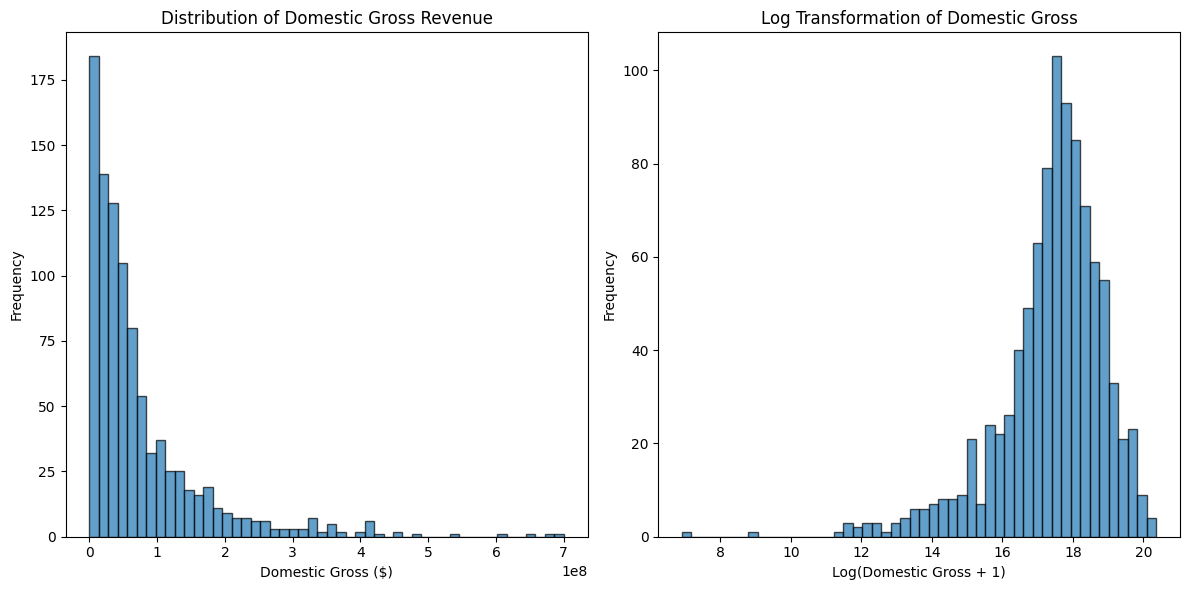

Skewness: 2.71
Kurtosis: 9.94


In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(merged_df['domestic_gross'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Domestic Gross Revenue')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(merged_df['domestic_gross']), bins=50, edgecolor='black', alpha=0.7)
plt.title('Log Transformation of Domestic Gross')
plt.xlabel('Log(Domestic Gross + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Skewness: {merged_df['domestic_gross'].skew():.2f}")
print(f"Kurtosis: {merged_df['domestic_gross'].kurtosis():.2f}")

### Domestic Gross by Genre

We expanded the dataset so that movies with multiple genres are counted under each genre.  
For each genre, we calculated the **average, median, and count** of domestic gross revenue.  
To ensure reliability, only genres with more than 10 movies were included.

The chart below shows the **average domestic gross by genre**, highlighting which genres tend to perform better financially.


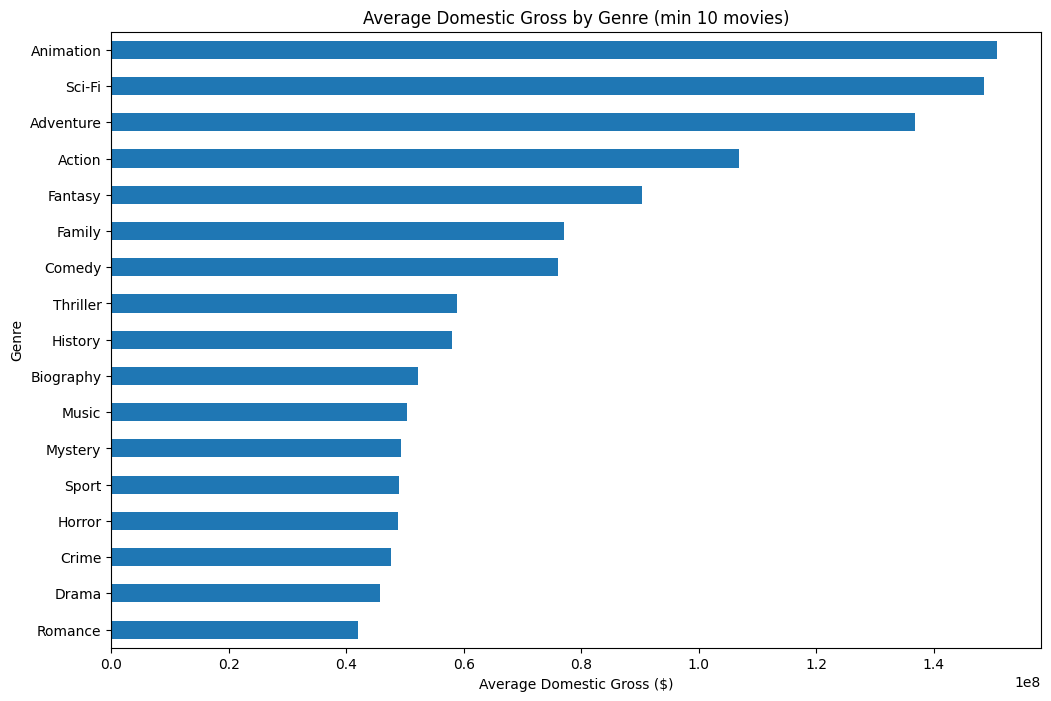

In [14]:
# Explode genres into separate rows
genre_df = merged_df.copy()
genre_df['genres'] = genre_df['genres'].str.split(',')
genre_df = genre_df.explode('genres')

genre_performance = genre_df.groupby('genres')['domestic_gross'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
genre_performance = genre_df.groupby('genres')['domestic_gross'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
genre_performance = genre_performance[genre_performance['count'] > 10]  # Only genres with more than 10 movies

plt.figure(figsize=(12, 8))
genre_performance['mean'].plot(kind='barh')
plt.title('Average Domestic Gross by Genre (min 10 movies)')
plt.xlabel('Average Domestic Gross ($)')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

In [15]:
genre_performance['count']

genres
Animation     84
Sci-Fi        95
Adventure    276
Action       315
Fantasy       79
Family        64
Comedy       350
Thriller     170
History       28
Biography     89
Music         27
Mystery       82
Sport         18
Horror        94
Crime        151
Drama        435
Romance      118
Name: count, dtype: int64

### Regression Analysis: High-Profit Genres

To test whether certain genres consistently outperform others, we created a binary variable for "high-profit genres" (Animation, Sci-Fi, Adventure, Action, Fantasy).  
We then ran a simple linear regression with **average domestic gross** as the dependent variable and **high-profit genre (1 = yes, 0 = no)** as the independent variable.  

- **H₀ (Null Hypothesis):** No significant difference in domestic gross between high-profit genres and other genres.  
- **H₁ (Alternative Hypothesis):** High-profit genres have significantly higher domestic gross.  

The regression summary, t-statistic, p-value, and confidence intervals indicate whether belonging to a high-profit genre significantly predicts higher domestic revenue.


Dataset Overview:


,genre,avg_domestic_gross,movie_count,high_profit_genre
genres,,,,
Animation,Animation,1.507548e+08,84,1
Sci-Fi,Sci-Fi,1.486383e+08,95,1
Adventure,Adventure,1.368479e+08,276,1
Action,Action,1.069488e+08,315,1
Fantasy,Fantasy,9.034903e+07,79,1
Family,Family,7.701712e+07,64,0
Comedy,Comedy,7.610510e+07,350,0
Thriller,Thriller,5.892841e+07,170,0
History,History,5.794286e+07,28,0


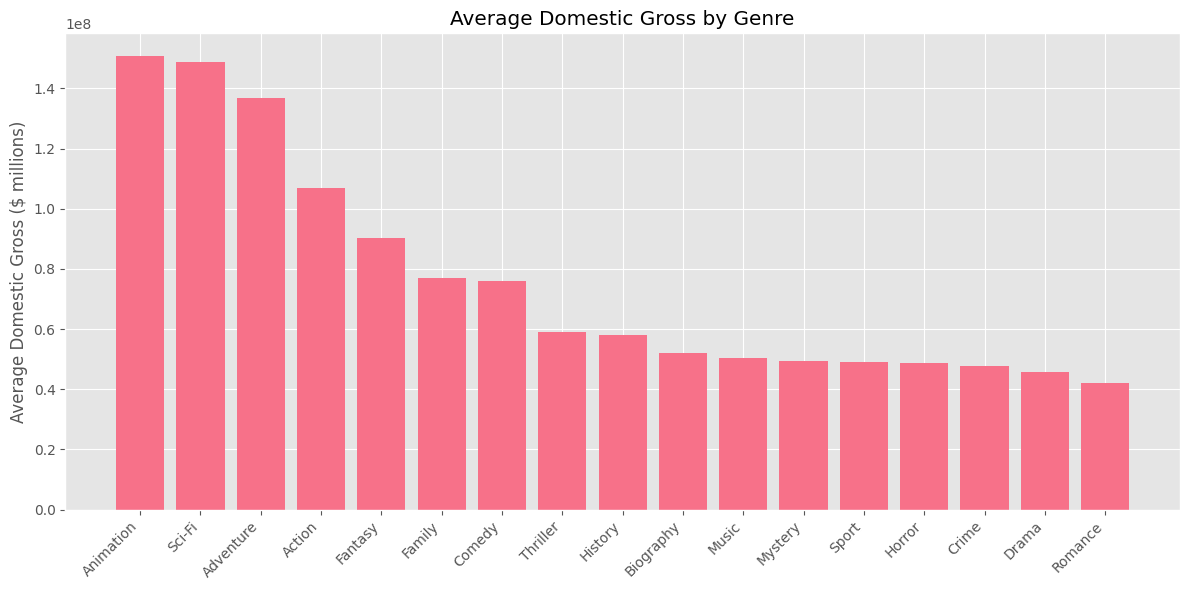


LINEAR REGRESSION ANALYSIS: High-Profit Genres vs Domestic Gross

HYPOTHESIS TESTING:
Null Hypothesis (H₀): There is NO significant difference in domestic gross
                     between high-profit genres and other genres
Alternative Hypothesis (H₁): There IS a significant difference in domestic gross
                           between high-profit genres and other genres

REGRESSION RESULTS:
                            OLS Regression Results                            
Dep. Variable:     avg_domestic_gross   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     64.46
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           8.24e-07
Time:                        20:55:11   Log-Likelihood:                -305.96
No. Observations:                  17   AIC:                             615.9
Df Residuals:                      15   BIC:   

In [16]:
#import simple linear regression libaries
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('ggplot')
sns.set_palette("husl")

# Create sample data based on the visualization (in millions)
genre_data = {
    'genre': genre_performance.index,
    'avg_domestic_gross': genre_performance['mean'],
    'movie_count': genre_performance['count']
}

df = pd.DataFrame(genre_data)

# Create a binary variable for "high-profit" genres (top 5 from visualization)
df['high_profit_genre'] = df['genre'].isin(['Animation','Sci-Fi', 'Adventure', 'Action', 'Fantasy']).astype(int)

print("Dataset Overview:")
display(df.head(10))

# Exploratory analysis
plt.figure(figsize=(12, 6))
plt.bar(df['genre'], df['avg_domestic_gross'])
plt.xticks(rotation=45, ha='right')
plt.title('Average Domestic Gross by Genre')
plt.ylabel('Average Domestic Gross ($ millions)')
plt.tight_layout()
plt.show()

# Build OLS regression model
model = ols('avg_domestic_gross ~ high_profit_genre', data=df).fit()

print("\n" + "="*60)
print("LINEAR REGRESSION ANALYSIS: High-Profit Genres vs Domestic Gross")
print("="*60)

# Hypothesis Testing
print("\nHYPOTHESIS TESTING:")
print("Null Hypothesis (H₀): There is NO significant difference in domestic gross")
print("                     between high-profit genres and other genres")
print("Alternative Hypothesis (H₁): There IS a significant difference in domestic gross")
print("                           between high-profit genres and other genres")

# Model summary
print("\nREGRESSION RESULTS:")
print(model.summary())

# Extract key statistics
alpha = 0.05  # Significance level
conf_level = (1 - alpha) * 100
t_stat = model.tvalues['high_profit_genre']
p_value = model.pvalues['high_profit_genre']
conf_int = model.conf_int().loc['high_profit_genre']
r_squared = model.rsquared

print(f"\nKEY STATISTICS:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Confidence Level: {conf_level}%")
print(f"95% Confidence Interval for high_profit_genre coefficient: [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")

### Hypothesis Test 

We tested whether high-profit genres (Sci-Fi, Animation, Adventure, Action, Fantasy) earn significantly more than other genres. The analysis shows the statistical results, effect size, and business recommendations based on the findings.


Critical t-value (α=0.05, two-tailed): ±2.1314


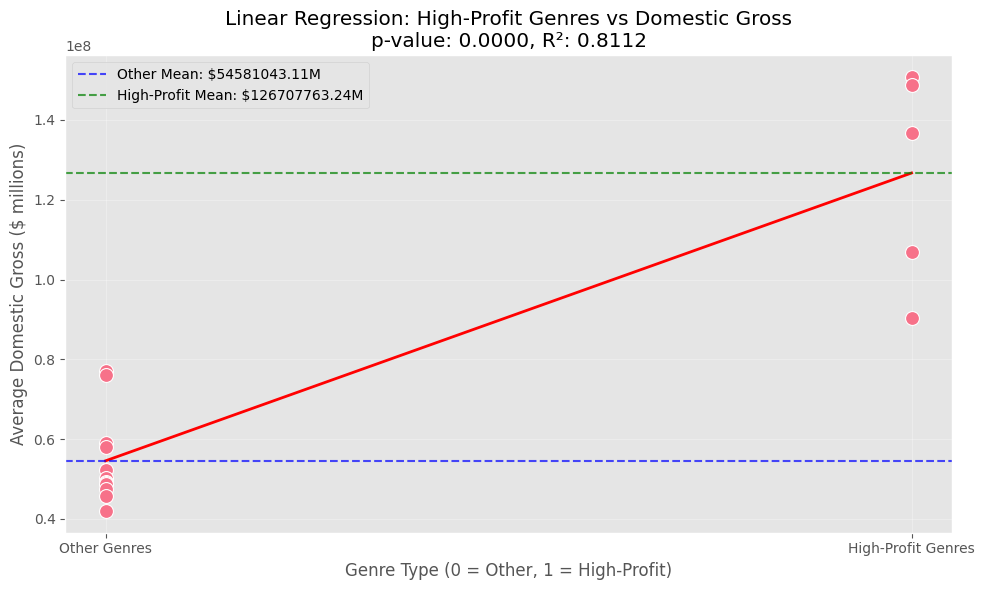


EFFECT SIZE ANALYSIS:
Average difference: $72126720.13 million
Percentage increase: 132.1%

STATISTICAL CONCLUSION:
REJECT the null hypothesis
There is statistically significant evidence that high-profit genres
(Animation, Sci-Fi, Adventure, Action, Fantasy) generate higher domestic gross
(p = 0.0000 < α = 0.05)

BUSINESS RECOMMENDATION:
Based on the statistical analysis, the crystal sinema production company  should prioritize
producing films in high-profit genres (Sci-Fi, Animation, Adventure, Action, Fantasy).
These genres show an average increase of $72126720.13 million
(132.1%) in domestic gross compared to other genres.

Confidence in recommendation: 95.0% confidence level


In [17]:
# Calculate critical value (two-tailed test)
from scipy import stats
critical_value = stats.t.ppf(1 - alpha/2, df=model.df_resid)
print(f"Critical t-value (α=0.05, two-tailed): ±{critical_value:.4f}")

# Visualization of regression results
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(x='high_profit_genre', y='avg_domestic_gross', data=df, s=100)
plt.plot(df['high_profit_genre'], model.predict(), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Genre Type (0 = Other, 1 = High-Profit)')
plt.ylabel('Average Domestic Gross ($ millions)')
plt.title('Linear Regression: High-Profit Genres vs Domestic Gross\n'
          f'p-value: {p_value:.4f}, R²: {r_squared:.4f}')
plt.xticks([0, 1], ['Other Genres', 'High-Profit Genres'])

# Add mean lines for each group
mean_other = df[df['high_profit_genre'] == 0]['avg_domestic_gross'].mean()
mean_high = df[df['high_profit_genre'] == 1]['avg_domestic_gross'].mean()
plt.axhline(y=mean_other, color='blue', linestyle='--', alpha=0.7, label=f'Other Mean: ${mean_other:.2f}M')
plt.axhline(y=mean_high, color='green', linestyle='--', alpha=0.7, label=f'High-Profit Mean: ${mean_high:.2f}M')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Effect size calculation
effect_size = mean_high - mean_other
print(f"\nEFFECT SIZE ANALYSIS:")
print(f"Average difference: ${effect_size:.2f} million")
print(f"Percentage increase: {(effect_size/mean_other)*100:.1f}%")

# Statistical conclusion
print(f"\nSTATISTICAL CONCLUSION:")
if p_value < alpha:
    print("REJECT the null hypothesis")
    print("There is statistically significant evidence that high-profit genres")
    print(f"(Animation, Sci-Fi, Adventure, Action, Fantasy) generate higher domestic gross")
    print(f"(p = {p_value:.4f} < α = {alpha})")
else:
    print("FAIL TO REJECT the null hypothesis")
    print("There is insufficient evidence to conclude that high-profit genres")
    print("generate significantly different domestic gross compared to other genres")

# Business recommendation
print(f"\nBUSINESS RECOMMENDATION:")
if p_value < alpha:
    print("Based on the statistical analysis, the crystal sinema production company  should prioritize")
    print("producing films in high-profit genres (Sci-Fi, Animation, Adventure, Action, Fantasy).")
    print(f"These genres show an average increase of ${effect_size:.2f} million")
    print(f"({(effect_size/mean_other)*100:.1f}%) in domestic gross compared to other genres.")
else:
    print("The data does not provide strong statistical evidence to recommend")
    print("focusing specifically on the identified high-profit genres.")

print(f"\nConfidence in recommendation: {conf_level}% confidence level")

### Top 10 Highest Rated Movie Analyses

This visualization and table highlight the top 10 highest-rated movies (with at least 1,000 votes), showing their ratings, genres, and vote counts.


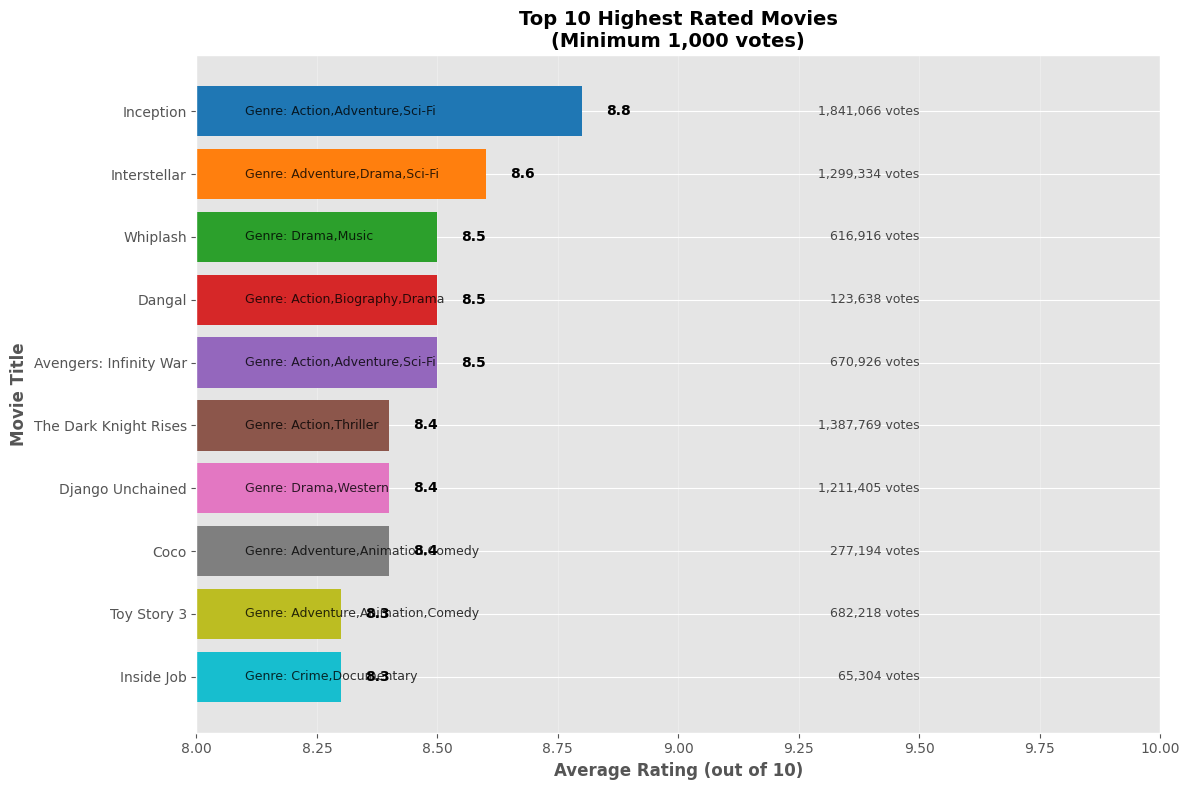

Top 10 Highest Rated Movies:
Movie Title                    Rating   Votes      Genre               
------------------------------------------------------------
Inception                      8.8      1,841,066  Action,Adventure,S  
Interstellar                   8.6      1,299,334  Adventure,Drama,Sc  
Whiplash                       8.5      616,916    Drama,Music         
Dangal                         8.5      123,638    Action,Biography,D  
Avengers: Infinity War         8.5      670,926    Action,Adventure,S  
The Dark Knight Rises          8.4      1,387,769  Action,Thriller     
Django Unchained               8.4      1,211,405  Drama,Western       
Coco                           8.4      277,194    Adventure,Animatio  
Toy Story 3                    8.3      682,218    Adventure,Animatio  
Inside Job                     8.3      65,304     Crime,Documentary   


In [18]:
# Filter for movies with significant votes (at least 1000 votes for credibility)
high_rated_movies = merged_df[merged_df['numvotes'] >= 1000]

# Get top 10 highest rated movies
top_10_rated = high_rated_movies.nlargest(10, 'averagerating')[['primary_title', 'genres', 'averagerating', 'numvotes', 'runtime_minutes']]

# Create visualization
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(top_10_rated['primary_title'], top_10_rated['averagerating'], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                       '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Add rating values on bars
for i, bar in enumerate(bars):
    rating = top_10_rated['averagerating'].iloc[i]
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{rating:.1f}', ha='left', va='center', fontweight='bold')

# Customize the plot
plt.xlabel('Average Rating (out of 10)', fontsize=12, fontweight='bold')
plt.ylabel('Movie Title', fontsize=12, fontweight='bold')
plt.title('Top 10 Highest Rated Movies\n(Minimum 1,000 votes)', fontsize=14, fontweight='bold')
plt.xlim(8, 10)  # Set x-axis limits to focus on high ratings

# Add genre information as text annotations
for i, (title, genre) in enumerate(zip(top_10_rated['primary_title'], top_10_rated['genres'])):
    plt.text(8.1, i, f'Genre: {genre}', va='center', fontsize=9, alpha=0.8)

# Add vote count information
for i, (title, votes) in enumerate(zip(top_10_rated['primary_title'], top_10_rated['numvotes'])):
    plt.text(9.5, i, f'{votes:,} votes', va='center', ha='right', fontsize=9, alpha=0.7)

plt.gca().invert_yaxis()  # Highest rating at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data table
print("Top 10 Highest Rated Movies:")
print("=" * 60)
print(f"{'Movie Title':<30} {'Rating':<8} {'Votes':<10} {'Genre':<20}")
print("-" * 60)
for _, row in top_10_rated.iterrows():
    print(f"{row['primary_title'][:28]:<30} {row['averagerating']:<8.1f} {row['numvotes']:<10,} {str(row['genres'])[:18]:<20}")

### Movie Rating Distribution

We plotted the distribution of IMDb average ratings and calculated descriptive statistics to understand the overall rating patterns of movies in the dataset.


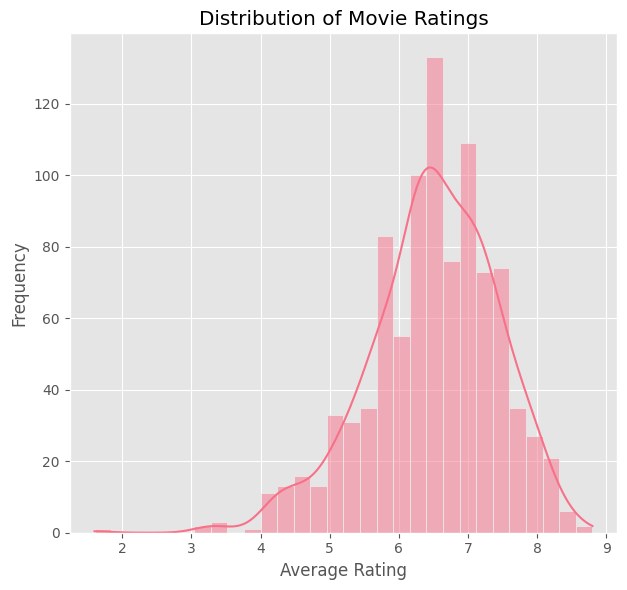

Rating Statistics:
count    953.000000
mean       6.487513
std        0.939606
min        1.600000
25%        5.900000
50%        6.500000
75%        7.100000
max        8.800000
Name: averagerating, dtype: float64


In [19]:
# Rating distribution analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(merged_df['averagerating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Rating statistics
print("Rating Statistics:")
print(merged_df['averagerating'].describe())

### Simple linear regression model to analyze the relationship between movie ratings and number of votes

In [20]:
# Create the dataset from the provided information
data = {
    'movie': top_10_rated['primary_title'],
    'genre': top_10_rated['genres'],
    'rating': top_10_rated['averagerating'], 
    'votes': top_10_rated['numvotes']
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)
print(f"\nDataset shape: {df.shape}")

Dataset:
                      movie                       genre  rating    votes
1                 Inception     Action,Adventure,Sci-Fi     8.8  1841066
493            Interstellar      Adventure,Drama,Sci-Fi     8.6  1299334
554                Whiplash                 Drama,Music     8.5   616916
710                  Dangal      Action,Biography,Drama     8.5   123638
872  Avengers: Infinity War     Action,Adventure,Sci-Fi     8.5   670926
267   The Dark Knight Rises             Action,Thriller     8.4  1387769
277        Django Unchained               Drama,Western     8.4  1211405
798                    Coco  Adventure,Animation,Comedy     8.4   277194
0               Toy Story 3  Adventure,Animation,Comedy     8.3   682218
118              Inside Job           Crime,Documentary     8.3    65304

Dataset shape: (10, 4)


Dataset Summary Statistics:
          rating         votes
count  10.000000  1.000000e+01
mean    8.470000  8.175770e+05
std     0.149443  5.943635e+05
min     8.300000  6.530400e+04
25%     8.400000  3.621245e+05
50%     8.450000  6.765720e+05
75%     8.500000  1.277352e+06
max     8.800000  1.841066e+06

Correlation between rating and votes: 0.6134
Correlation between rating and log(votes): 0.4897


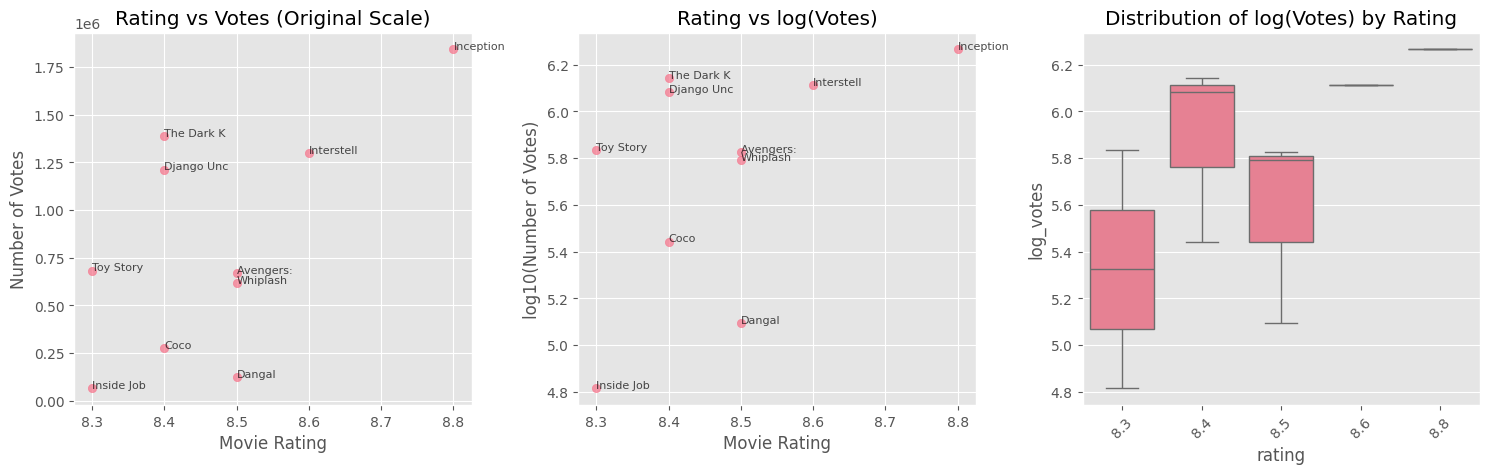

In [21]:
# Exploratory Data Analysis
print("Dataset Summary Statistics:")
print(df[['rating', 'votes']].describe())

# Since votes vary greatly, let's use log transformation for better visualization
df['log_votes'] = np.log10(df['votes'])

# Correlation analysis
correlation = df['rating'].corr(df['votes'])
correlation_log = df['rating'].corr(df['log_votes'])
print(f"\nCorrelation between rating and votes: {correlation:.4f}")
print(f"Correlation between rating and log(votes): {correlation_log:.4f}")

# Visualize the relationship
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['rating'], df['votes'], alpha=0.7)
plt.xlabel('Movie Rating')
plt.ylabel('Number of Votes')
plt.title('Rating vs Votes (Original Scale)')
for i, txt in enumerate(df['movie']):
    plt.annotate(txt[:10], (df['rating'].iloc[i], df['votes'].iloc[i]), 
                 fontsize=8, alpha=0.7)

plt.subplot(1, 3, 2)
plt.scatter(df['rating'], df['log_votes'], alpha=0.7)
plt.xlabel('Movie Rating')
plt.ylabel('log10(Number of Votes)')
plt.title('Rating vs log(Votes)')
for i, txt in enumerate(df['movie']):
    plt.annotate(txt[:10], (df['rating'].iloc[i], df['log_votes'].iloc[i]), 
                 fontsize=8, alpha=0.7)

plt.subplot(1, 3, 3)
sns.boxplot(x='rating', y='log_votes', data=df)
plt.title('Distribution of log(Votes) by Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Ratings vs Votes Analysis

We analyzed the relationship between IMDb ratings and the number of votes for the top 10 movies.  
- Summary statistics were calculated for ratings and votes.  
- A log transformation of votes was applied to reduce skewness.  
- Correlation analysis showed how ratings relate to both raw and log-transformed votes.  
- Scatterplots and a boxplot illustrate these relationships, highlighting patterns that are clearer on the log scale.


In [22]:
# Build OLS regression model: Rating vs log(Votes)
X = df['rating']
y = df['log_votes']  # Using log transformation for better linear relationship

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print model summary
print("OLS Regression Results: Rating vs log(Votes)")
print("=" * 60)
print(model.summary())
print("=" * 60)

# Get model parameters
params = model.params
conf_int = model.conf_int()

OLS Regression Results: Rating vs log(Votes)
                            OLS Regression Results                            
Dep. Variable:              log_votes   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2.523
Date:                Tue, 09 Sep 2025   Prob (F-statistic):              0.151
Time:                        20:55:12   Log-Likelihood:                -4.9621
No. Observations:                  10   AIC:                             13.92
Df Residuals:                       8   BIC:                             14.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [23]:
# Hypothesis Testing Details
print("HYPOTHESIS TESTING DETAILS")
print("=" * 50)

# Define hypotheses
print("Null Hypothesis (No relationship between movie rating and number of votes)")
print("Alternative Hypothesis (There is a relationship between movie rating and number of votes)")
print("")

# Significance level
alpha = 0.05
print(f"Significance Level (α): {alpha}")

# Test statistics
t_statistic = model.tvalues[1]
p_value = model.pvalues[1]
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.6f}")

# Critical value (two-tailed test)
df_residual = model.df_resid
critical_value = stats.t.ppf(1 - alpha/2, df_residual)
print(f"Critical t-value (±): {critical_value:.4f}")

# Confidence interval
conf_level = 0.95
conf_int_rating = model.conf_int().loc['rating']
print(f"{conf_level*100}% Confidence Interval for: ({conf_int_rating[0]:.4f}, {conf_int_rating[1]:.4f})")

print("")
print("DECISION AND CONCLUSION")
print("=" * 50)

# Decision rule
if p_value < alpha:
    print("REJECT the null hypothesis")
    print("There is sufficient evidence to conclude that movie rating")
    print("has a statistically significant relationship with number of votes.")
else:
    print("FAIL TO REJECT the null hypothesis")
    print("There is insufficient evidence to conclude that movie rating")
    print("has a statistically significant relationship with number of votes.")

# Check if critical value is exceeded
if abs(t_statistic) > critical_value:
    print("The test statistic exceeds the critical value")
else:
    print("The test statistic does not exceed the critical value")

# Business recommendation
print(f"\nBUSINESS RECOMMENDATION:")
if p_value < alpha:
    print("Based on the statistical analysis, the crystal sinema production company should prioritize")
    print("the highly rated movies against the number of votes as their is a relationship")
else:
    print("The data does not provide strong statistical evidence to recommend")
    print("focusing specifically on the highly rated movies and their votes.")

print(f"\nConfidence in recommendation: {conf_level*100}% Confidence Interval")

HYPOTHESIS TESTING DETAILS
Null Hypothesis (No relationship between movie rating and number of votes)
Alternative Hypothesis (There is a relationship between movie rating and number of votes)

Significance Level (α): 0.05
t-statistic: 1.5884
p-value: 0.150855
Critical t-value (±): 2.3060
95.0% Confidence Interval for: (-0.7112, 3.8598)

DECISION AND CONCLUSION
FAIL TO REJECT the null hypothesis
There is insufficient evidence to conclude that movie rating
has a statistically significant relationship with number of votes.
The test statistic does not exceed the critical value

BUSINESS RECOMMENDATION:
The data does not provide strong statistical evidence to recommend
focusing specifically on the highly rated movies and their votes.

Confidence in recommendation: 95.0% Confidence Interval


### Regression and Residual Analysis

We performed a linear regression to model the relationship between movie ratings and the log of vote counts.  
- The regression plot shows the best-fit line with a 95% confidence interval around predictions.  
- The residual plot helps assess model validity by showing how errors are distributed relative to predicted values. Ideally, residuals should scatter randomly around zero.


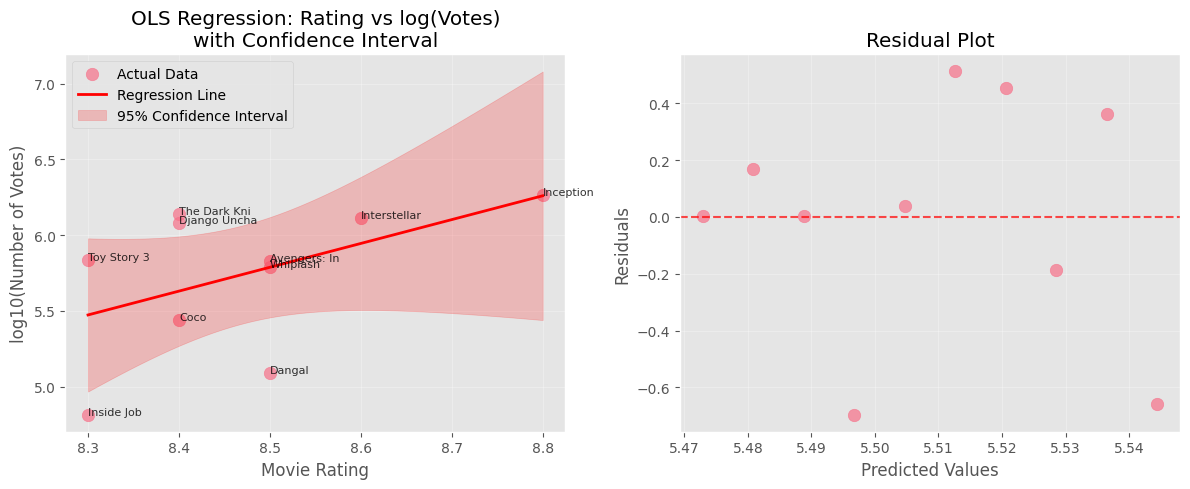

In [24]:
# Visualization of regression results
plt.figure(figsize=(12, 5))

# Plot 1: Regression line with confidence interval
plt.subplot(1, 2, 1)
x_values = np.linspace(df['rating'].min(), df['rating'].max(), 100)
X_pred = sm.add_constant(x_values)
y_pred = model.get_prediction(X_pred)

# Get confidence intervals
conf_int = y_pred.conf_int()

plt.scatter(df['rating'], df['log_votes'], alpha=0.7, label='Actual Data', s=80)
plt.plot(x_values, y_pred.predicted_mean, 'r-', label='Regression Line', linewidth=2)
plt.fill_between(x_values, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, 
                 label='95% Confidence Interval')

plt.xlabel('Movie Rating')
plt.ylabel('log10(Number of Votes)')
plt.title('OLS Regression: Rating vs log(Votes)\nwith Confidence Interval')
plt.legend()
plt.grid(True, alpha=0.3)

# Add movie labels
for i, txt in enumerate(df['movie']):
    plt.annotate(txt[:12], (df['rating'].iloc[i], df['log_votes'].iloc[i]), 
                 fontsize=8, alpha=0.8)

# Plot 2: Residual analysis
plt.subplot(1, 2, 2)
residuals = model.resid
plt.scatter(y_pred.predicted_mean[:len(df)], residuals, alpha=0.7, s=80)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Model Diagnostics

We evaluated the regression model with key diagnostics:
- **R² and Adjusted R²** show the proportion of variance explained by ratings.  
- **F-statistic** tests if the model is statistically significant.  
- **Shapiro-Wilk test** checks normality of residuals (a key regression assumption).  
- **Cohen’s f²** provides effect size, indicating whether the model’s explanatory power is small, medium, or large.


In [25]:
# Additional model diagnostics
print("MODEL DIAGNOSTICS")
print("=" * 50)
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"Prob (F-statistic): {model.f_pvalue:.6f}")
print(f"Number of observations: {model.nobs}")

# Check for normality of residuals
print("\nNORMALITY TEST OF RESIDUALS (Shapiro-Wilk):")
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p:.6f}")

if shapiro_p > 0.05:
    print("Residuals appear to be normally distributed (p > 0.05)")
else:
    print("Residuals do not appear to be normally distributed (p ≤ 0.05)")

# Calculate effect size (Cohen's f²)
f_squared = (model.rsquared / (1 - model.rsquared))
print(f"\nEffect size (Cohen's f²): {f_squared:.4}")

MODEL DIAGNOSTICS
R-squared: 0.2398
Adjusted R-squared: 0.1447
F-statistic: 2.5231
Prob (F-statistic): 0.150855
Number of observations: 10.0

NORMALITY TEST OF RESIDUALS (Shapiro-Wilk):
Shapiro-Wilk statistic: 0.9080
p-value: 0.267710
Residuals appear to be normally distributed (p > 0.05)

Effect size (Cohen's f²): 0.3154


## What is the relationship between movie production budget and ROI?
This analysis examines whether a movie’s production budget has a significant impact on its ROI (Return on Investment).  


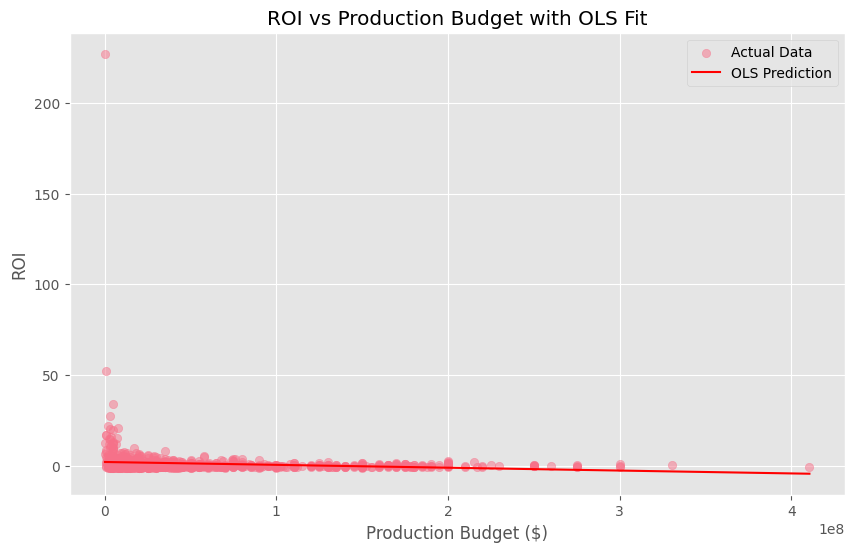

OLS REGRESSION ANALYSIS: ROI vs PRODUCTION BUDGET
Number of observations: 953.0
Coefficient for production_budget: -0.00000002
P-value: 0.000305
T-statistic: -3.6244
R-squared: 0.0136

CONCLUSION:
Reject the null hypothesis - There is a statistically significant relationship between production budget and ROI.

BUSINESS RECOMMENDATION:
Higher production budgets are associated with lower ROI. Consider optimizing budget allocation and focusing on factors beyond budget size like marketing strategy, genre selection, and talent choices.


In [28]:
# Calculate ROI
budget_df['roi'] = (budget_df['domestic_gross'] - budget_df['production_budget']) / budget_df['production_budget']

# Data cleaning
budget_df = budget_df.dropna(subset=['production_budget', 'roi'])
budget_df = budget_df[budget_df['production_budget'] > 0]

# Prepare data for OLS
X = sm.add_constant(budget_df['production_budget'])  # Add intercept
y = budget_df['roi']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Extract key statistics
n_obs = model.nobs
coefficient = model.params['production_budget']
p_value = model.pvalues['production_budget']
t_statistic = model.tvalues['production_budget']
r_squared = model.rsquared

# Hypothesis testing conclusion
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis - There is a statistically significant relationship between production budget and ROI."
else:
    conclusion = "Fail to reject the null hypothesis - No statistically significant relationship found between production budget and ROI."

# Business recommendation
if p_value < alpha and coefficient < 0:
    recommendation = "Higher production budgets are associated with lower ROI. Consider optimizing budget allocation and focusing on factors beyond budget size like marketing strategy, genre selection, and talent choices."
else:
    recommendation = "Production budget doesn't show a clear relationship with ROI. Focus on other factors that might influence movie success."

# Create visualization
budget_range = np.linspace(budget_df['production_budget'].min(), budget_df['production_budget'].max(), 1000)
X_pred = sm.add_constant(budget_range)
y_pred = model.predict(X_pred)

plt.figure(figsize=(10, 6))
plt.scatter(budget_df['production_budget'], budget_df['roi'], alpha=0.5, label='Actual Data')
plt.plot(budget_range, y_pred, color='red', label='OLS Prediction')
plt.title("ROI vs Production Budget with OLS Fit")
plt.xlabel("Production Budget ($)")
plt.ylabel("ROI")
plt.legend()
plt.show()

# Print results
print("="*50)
print("OLS REGRESSION ANALYSIS: ROI vs PRODUCTION BUDGET")
print("="*50)
print(f"Number of observations: {n_obs}")
print(f"Coefficient for production_budget: {coefficient:.8f}")
print(f"P-value: {p_value:.6f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"R-squared: {r_squared:.4f}")
print("\nCONCLUSION:")
print(conclusion)
print("\nBUSINESS RECOMMENDATION:")
print(recommendation)
print("="*50)

## Business Insights and Recomendations
### 1. Focus on High-Profit Genres
- Movies in genres like Sci-Fi, Animation, Adventure, Action, and Fantasy consistently outperform others, generating on average 132% more domestic gross than non–high-profit genres.
#### Recommendation: Prioritize producing films in these genres to maximize revenue potential.

### 2. Ratings Alone Don’t Guarantee Profit
- While high IMDb ratings are good for reputation, the analysis shows that high ratings and large vote counts do not strongly correlate with domestic gross performance.
#### Recommendation: Don’t rely solely on ratings when greenlighting projects; instead, combine ratings with genre selection and budget efficiency for decision-making.

### 3. Budget Efficiency Matters More than Size
- The regression analysis found that higher production budgets are associated with lower ROI. Simply spending more doesn’t guarantee higher returns.
#### Recommendation: Adopt budget optimization strategies—balance costs with effective marketing, genre selection, and strong storytelling instead of overspending on production.